<a href="https://colab.research.google.com/github/angelrodriguez0617/CS-4710-Machine-Learning-II/blob/main/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Angel Rodriguez, March 1, 2024
Phantom Classification

# CS 4710 - A7



** Phantom Generator **

In [63]:
## Copyright (C) 2010  Alex Opie  <lx_op@orcon.net.nz>
##
## This program is free software; you can redistribute it and/or modify it
## under the terms of the GNU General Public License as published by
## the Free Software Foundation; either version 3 of the License, or (at
## your option) any later version.
##
## This program is distributed in the hope that it will be useful, but
## WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.	See the GNU
## General Public License for more details.
##
## You should have received a copy of the GNU General Public License
## along with this program; see the file COPYING.  If not, see
## <http://www.gnu.org/licenses/>.

import numpy as np

def phantom (n = 64, p_type = 'Modified Shepp-Logan', ellipses = None):
	"""
	 phantom (n = 256, p_type = 'Modified Shepp-Logan', ellipses = None)

	Create a Shepp-Logan or modified Shepp-Logan phantom.

	A phantom is a known object (either real or purely mathematical)
	that is used for testing image reconstruction algorithms.  The
	Shepp-Logan phantom is a popular mathematical model of a cranial
	slice, made up of a set of ellipses.  This allows rigorous
	testing of computed tomography (CT) algorithms as it can be
	analytically transformed with the radon transform (see the
	function `radon').

	Inputs
	------
	n : The edge length of the square image to be produced.

	p_type : The type of phantom to produce. Either
	  "Modified Shepp-Logan" or "Shepp-Logan".  This is overridden
	  if `ellipses' is also specified.

	ellipses : Custom set of ellipses to use.  These should be in
	  the form
	  	[[I, a, b, x0, y0, phi],
	  	 [I, a, b, x0, y0, phi],
	  	 ...]
	  where each row defines an ellipse.
	  I : Additive intensity of the ellipse.
	  a : Length of the major axis.
	  b : Length of the minor axis.
	  x0 : Horizontal offset of the centre of the ellipse.
	  y0 : Vertical offset of the centre of the ellipse.
	  phi : Counterclockwise rotation of the ellipse in degrees,
	        measured as the angle between the horizontal axis and
	        the ellipse major axis.
	  The image bounding box in the algorithm is [-1, -1], [1, 1],
	  so the values of a, b, x0, y0 should all be specified with
	  respect to this box.

	Output
	------
	P : A phantom image.

	Usage example
	-------------
	  import matplotlib.pyplot as pl
	  P = phantom ()
	  pl.imshow (P)

	References
	----------
	Shepp, L. A.; Logan, B. F.; Reconstructing Interior Head Tissue
	from X-Ray Transmissions, IEEE Transactions on Nuclear Science,
	Feb. 1974, p. 232.

	Toft, P.; "The Radon Transform - Theory and Implementation",
	Ph.D. thesis, Department of Mathematical Modelling, Technical
	University of Denmark, June 1996.

	"""

	if (ellipses is None):
		ellipses = _select_phantom (p_type)
	elif (np.size (ellipses, 1) != 6):
		raise AssertionError ("Wrong number of columns in user phantom")

	# Blank image
	p = np.zeros ((n, n))

	# Create the pixel grid
	ygrid, xgrid = np.mgrid[-1:1:(1j*n), -1:1:(1j*n)]

	for ellip in ellipses:
		I   = ellip [0]
		a2  = ellip [1]**2
		b2  = ellip [2]**2
		x0  = ellip [3]
		y0  = ellip [4]
		phi = ellip [5] * np.pi / 180  # Rotation angle in radians

		# Create the offset x and y values for the grid
		x = xgrid - x0
		y = ygrid - y0

		cos_p = np.cos (phi)
		sin_p = np.sin (phi)

		# Find the pixels within the ellipse
		locs = (((x * cos_p + y * sin_p)**2) / a2
              + ((y * cos_p - x * sin_p)**2) / b2) <= 1

		# Add the ellipse intensity to those pixels
		p [locs] += I

	return p


def _select_phantom (name):
	if (name.lower () == 'shepp-logan'):
		e = _shepp_logan ()
	elif (name.lower () == 'modified shepp-logan'):
		e = _mod_shepp_logan ()
	else:
		raise ValueError ("Unknown phantom type: %s" % name)

	return e


def _shepp_logan ():
	#  Standard head phantom, taken from Shepp & Logan
	return [[   2,   .69,   .92,    0,      0,   0],
	        [-.98, .6624, .8740,    0, -.0184,   0],
	        [-.02, .1100, .3100,  .22,      0, -18],
	        [-.02, .1600, .4100, -.22,      0,  18],
	        [ .01, .2100, .2500,    0,    .35,   0],
	        [ .01, .0460, .0460,    0,     .1,   0],
	        [ .02, .0460, .0460,    0,    -.1,   0],
	        [ .01, .0460, .0230, -.08,  -.605,   0],
	        [ .01, .0230, .0230,    0,  -.606,   0],
	        [ .01, .0230, .0460,  .06,  -.605,   0]]

def _mod_shepp_logan ():
	#  Modified version of Shepp & Logan's head phantom,
	#  adjusted to improve contrast.  Taken from Toft.
	return [[   1,   .69,   .92,    0,      0,   0],
	        [-.80, .6624, .8740,    0, -.0184,   0],
	        [-.20, .1100, .3100,  .22,      0, -18],
	        [-.20, .1600, .4100, -.22,      0,  18],
	        [ .10, .2100, .2500,    0,    .35,   0],
	        [ .10, .0460, .0460,    0,     .1,   0],
	        [ .10, .0460, .0460,    0,    -.1,   0],
	        [ .10, .0460, .0230, -.08,  -.605,   0],
	        [ .10, .0230, .0230,    0,  -.606,   0],
	        [ .10, .0230, .0460,  .06,  -.605,   0]]

#def ?? ():
#	# Add any further phantoms of interest here
#	return np.array (
#	 [[ 0, 0, 0, 0, 0, 0],
#	  [ 0, 0, 0, 0, 0, 0]])




In [64]:

import numpy as np
import random
import matplotlib.pyplot as plt
from skimage.transform import iradon
from skimage.util import random_noise
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def normalize_image(image):
    """
    Normalize the image to the range [0, 1]
    """
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val)

# generate data
image_size = 28 # 28 x 28 phanton
num_phantoms = 1000
theta = np.arange(0, 360)


phantom_list = []
class_list = []


for i in range(num_phantoms):

    # a = np.random.randint(20,30,2)
    # print(a)


    x=np.random.random(24)

    E1 = [[   x[ 0]-0.0,   0.6*x[ 1]+0.2,   0.8*x[ 2]+0.2,    0.1*(x[ 3]-0.5),      0.1*(x[ 4]-0.5),   10*x[ 5]   ]]
    P1 = phantom (n = image_size, p_type = 'ellipses', ellipses = E1)
    # Normalize the phantom image
    P1 = normalize_image(P1)


    E2 = [[   x[ 0]-0.0,   0.6*x[ 1]+0.2,   0.8*x[ 2]+0.2,    0.1*(x[ 3]-0.5),      0.1*(x[ 4]-0.5),   10*x[ 5]   ],
         [   x[ 6]-0.1,   0.3*x[ 7]+0.2,   0.2*x[ 8]+0.2,    x[ 9]-0.5,      x[10]-0.5,   100*x[11]   ]]
    P2 = phantom (n = image_size, p_type = 'ellipses', ellipses = E2)
    # Normalize the phantom image
    P2 = normalize_image(P2)

    phantom_list.append(P1)
    phantom_list.append(P2)
    class_list.append(0)
    class_list.append(1)

# Map numerical labels to strings
class_strings = ["1 ellipse" if label == 0 else "2 ellipses" for label in class_list]

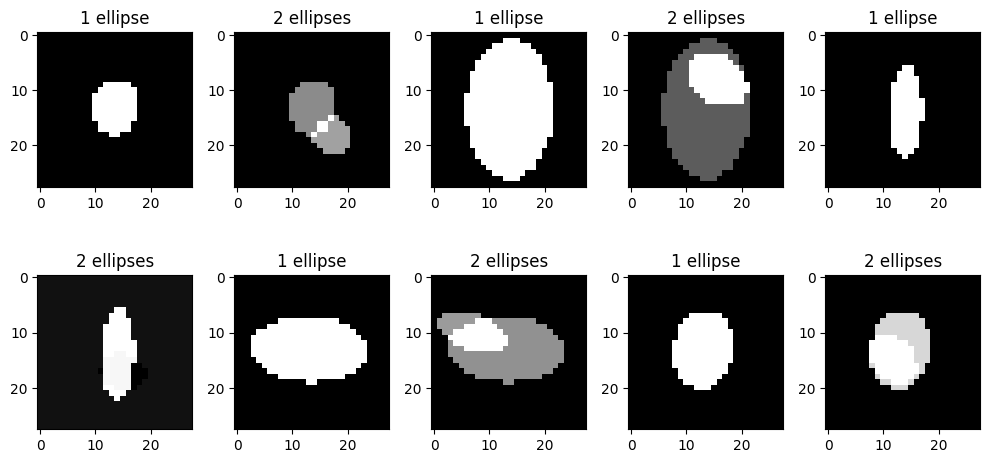

In [65]:
# Display phantoms
# fig, axs = plt.subplots(1, 5, figsize=(10, 3))
# for idx, ax in enumerate(axs):
#     ax.imshow(phantom_list[idx], cmap=plt.cm.Greys_r, vmin=0, vmax=1)
#     ax.set_title(f"{class_strings[idx]}")
# plt.show()

# Number of plots
n_plots = 10
# Display phantoms
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.ravel()  # flatten the array of axes
for idx, ax in enumerate(axs[:n_plots]):  # only loop over the number of plots
    ax.imshow(phantom_list[idx], cmap=plt.cm.Greys_r, vmin=0, vmax=1)
    ax.set_title(class_strings[idx])
plt.tight_layout()
plt.show()


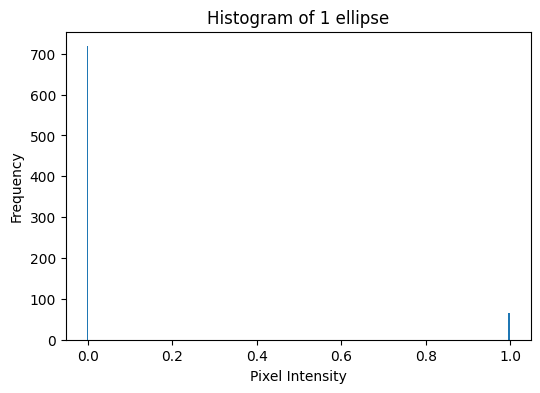

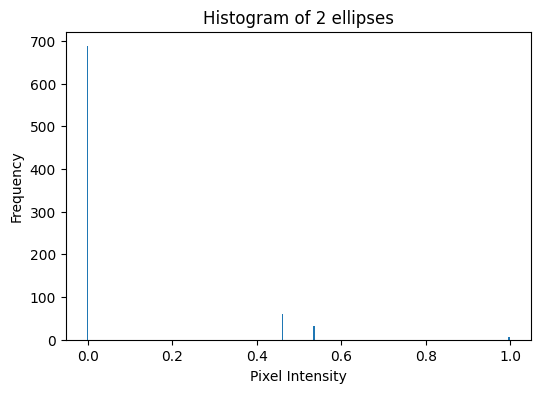

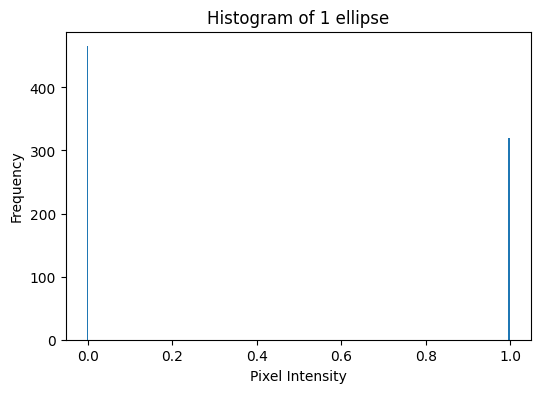

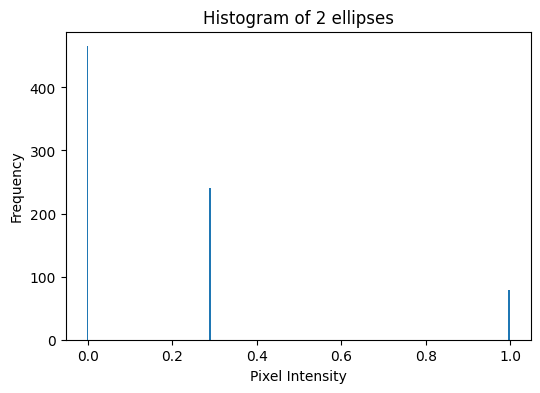

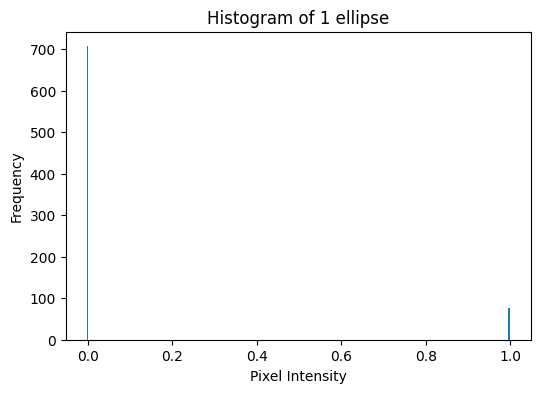

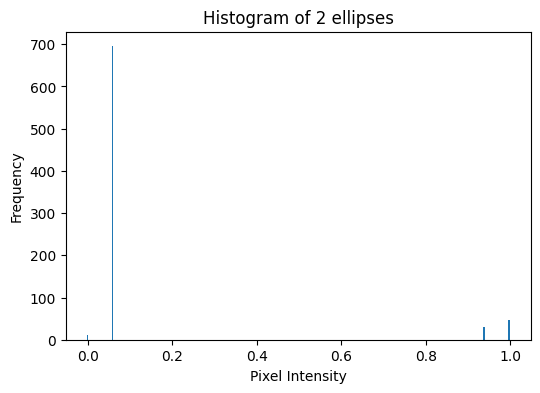

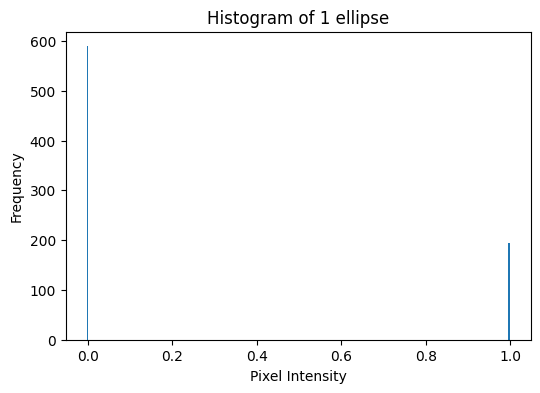

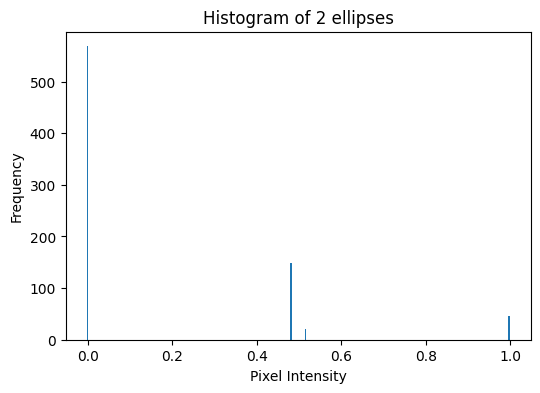

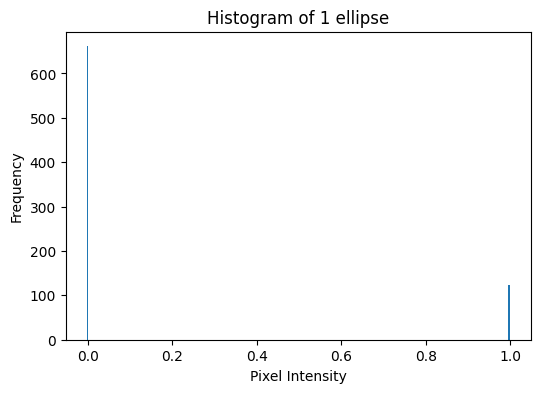

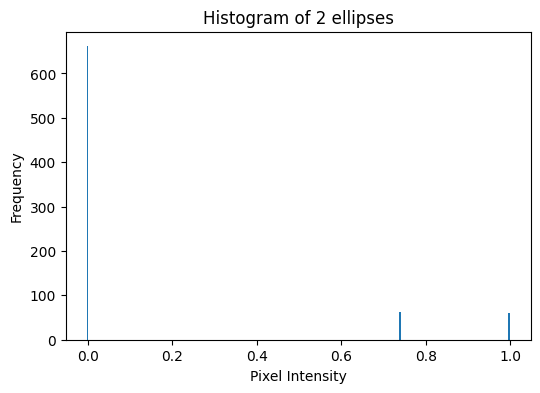

In [66]:
def compute_histogram(image, num_bins=256):
    """
    Compute the histogram of the image
    """
    histogram, bins = np.histogram(image.flatten(), bins=num_bins, range=[0, 1])
    return histogram, bins

hist_plots = 10

for i in range(hist_plots):
  # Compute the histogram
  histogram, bins = compute_histogram(phantom_list[i])
  # Plot the histogram
  plt.figure(figsize=(6, 4))
  plt.bar(bins[:-1], histogram, width=1.0/len(bins))
  plt.title(f"Histogram of {class_strings[i]}")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.show()


## Model: Using the quantity of nonzero integers in histograms
if quantity of nonzero integers in the histogram array is less than or equal to the threshold value,

predict 1 ellipse


else,

predict 2 ellipses

In [71]:
# Threshold for nonzero elements in histogram
threshhold = 2

# Make prediction array
prediction_list = [0 if np.count_nonzero(histogram) <= threshhold else 1 for index, (histogram, _) in enumerate((compute_histogram(image) for image in phantom_list))]
prediction_strings = ["1 ellipse" if label == 0 else "2 ellipses" for label in prediction_list]

correct_predictions = np.count_nonzero(np.array([prediction_list]) == np.array([class_list]))
total_samples = len(class_list)
accuracy = correct_predictions / total_samples

print(f"Accuracy: {100 * accuracy}%")



Accuracy: 99.7%


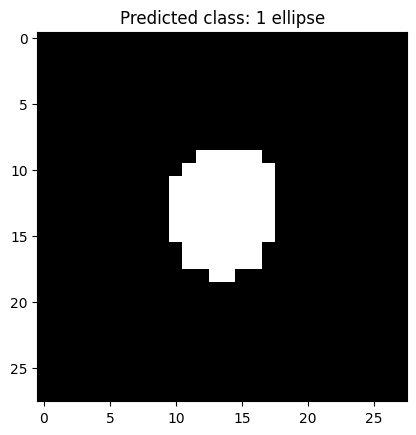

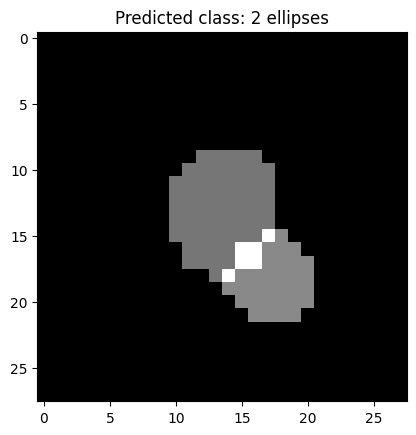

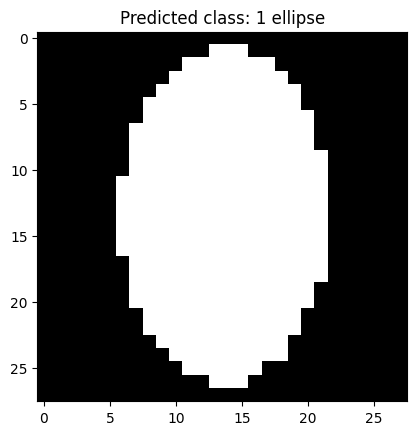

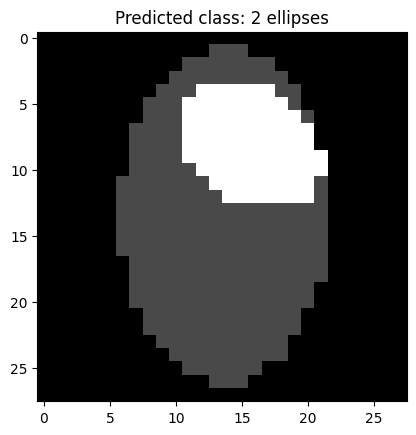

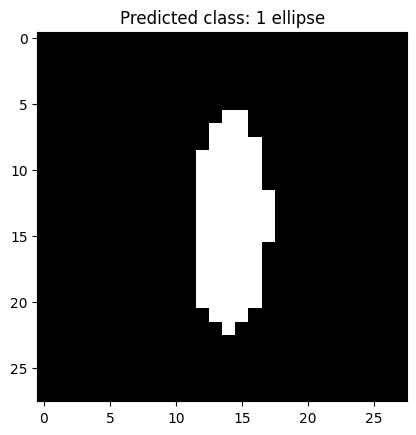

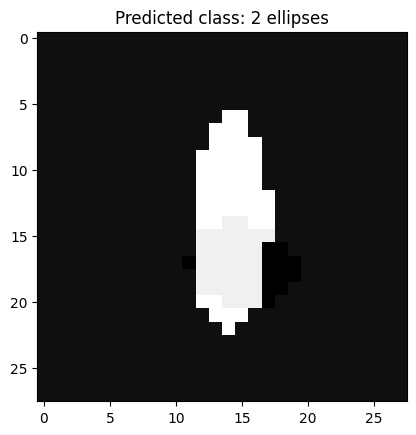

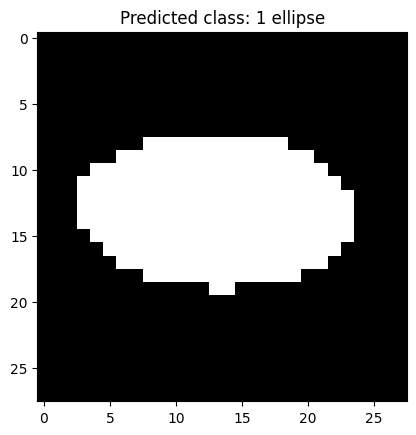

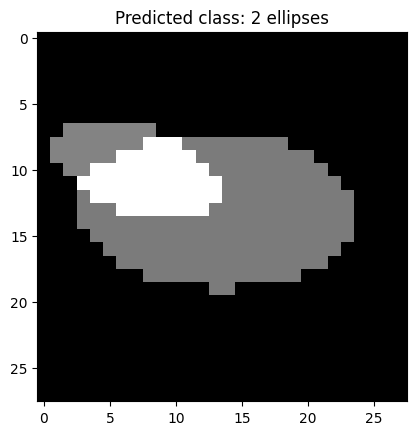

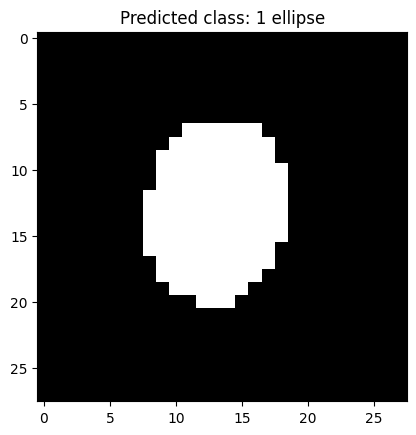

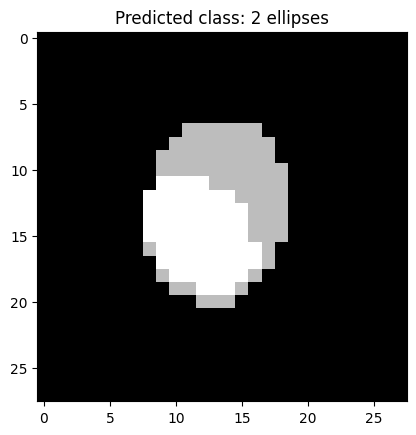

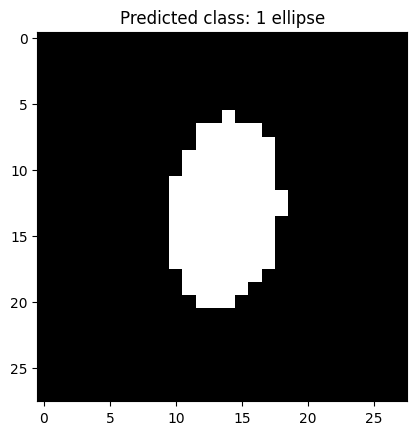

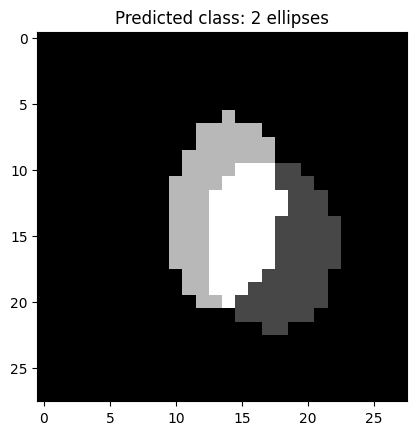

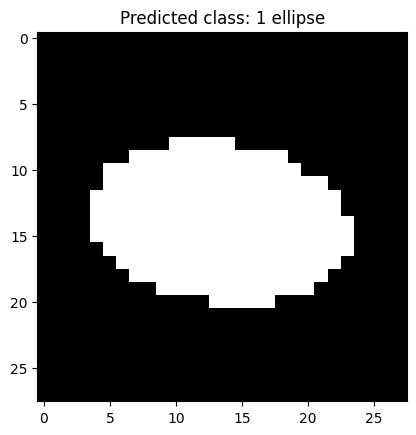

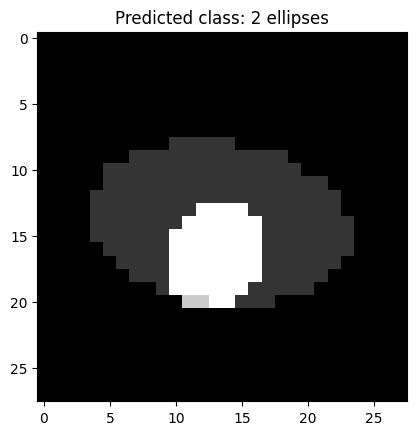

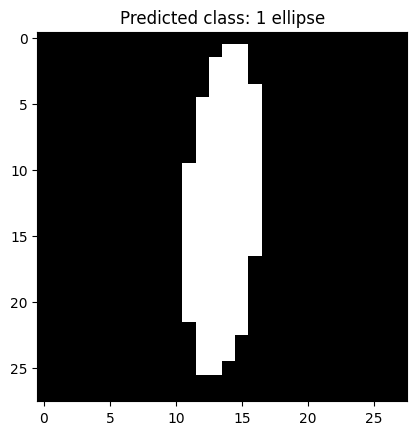

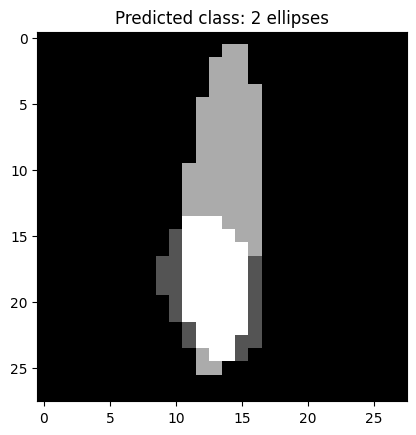

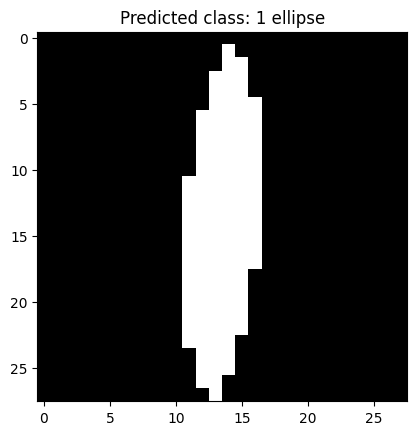

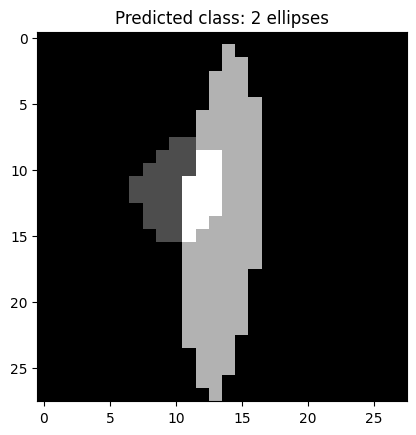

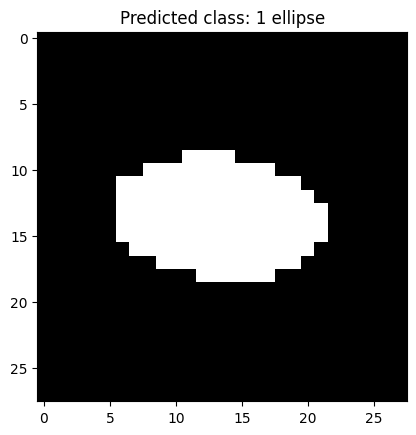

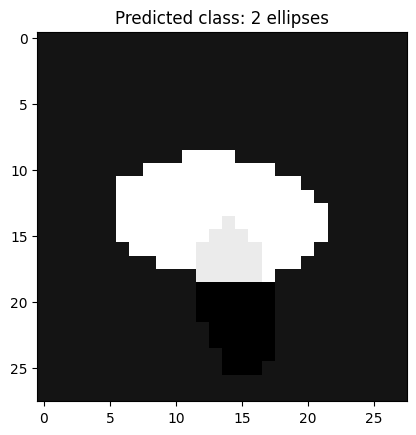

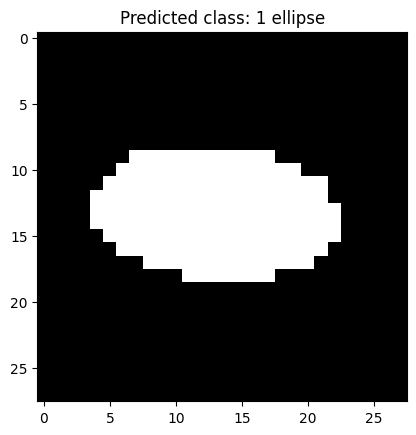

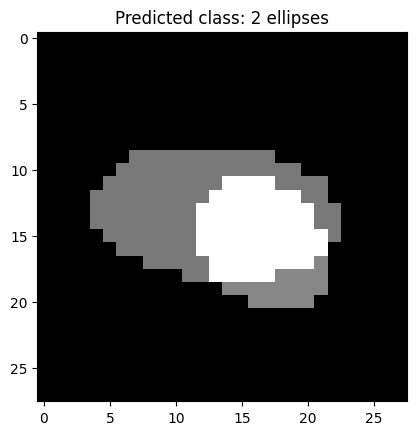

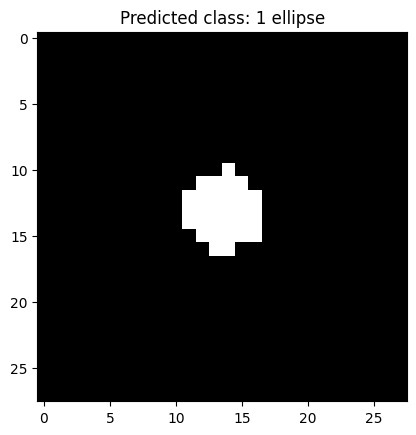

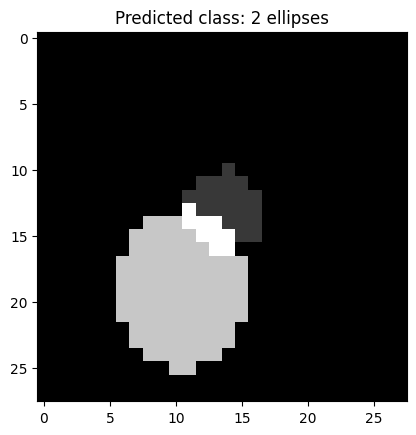

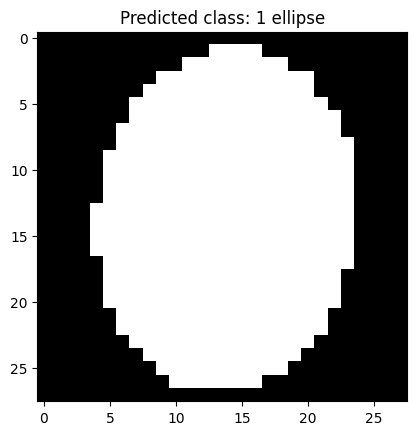

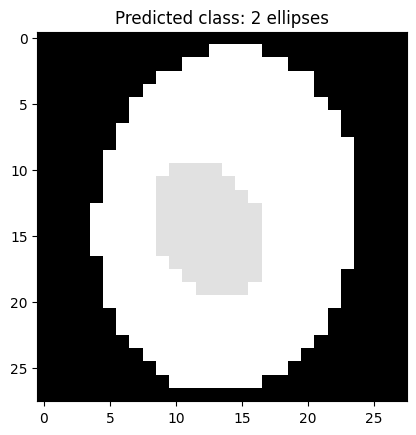

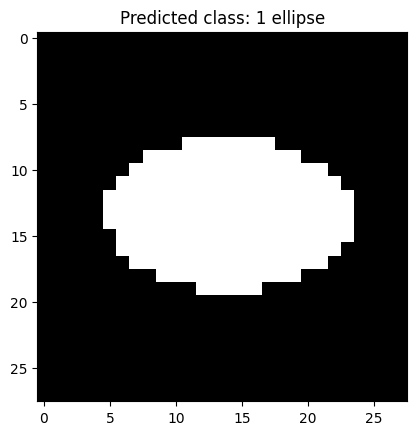

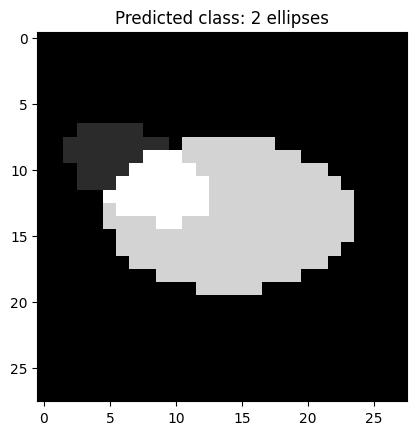

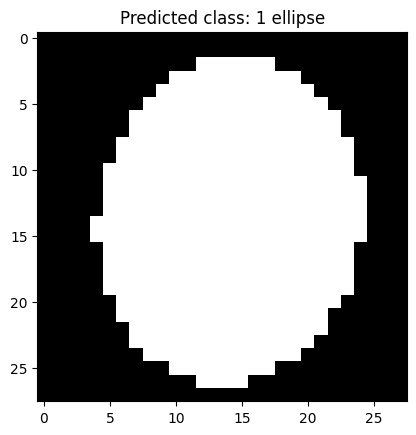

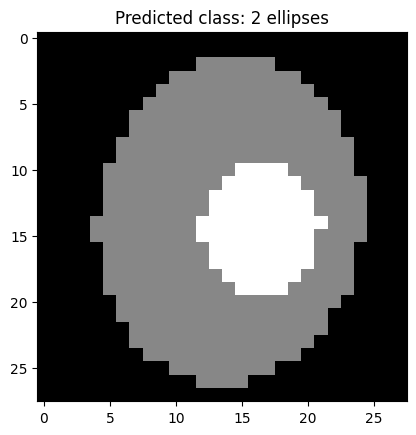

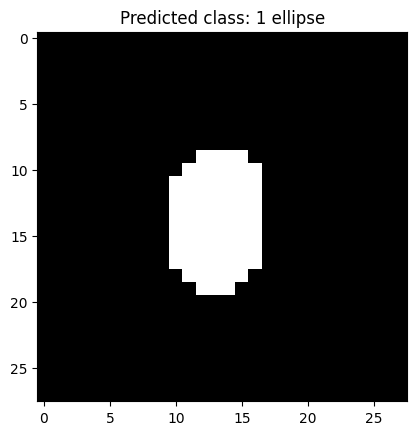

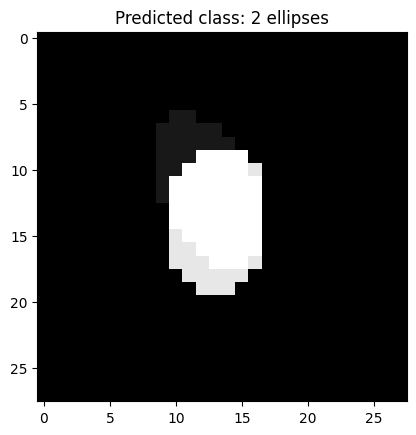

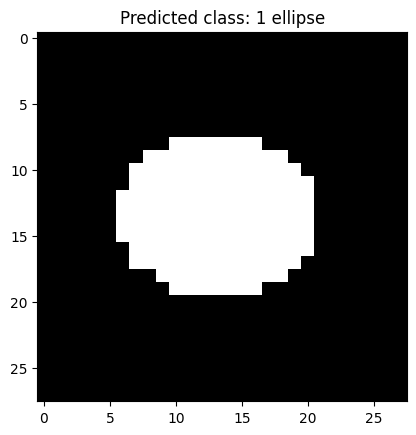

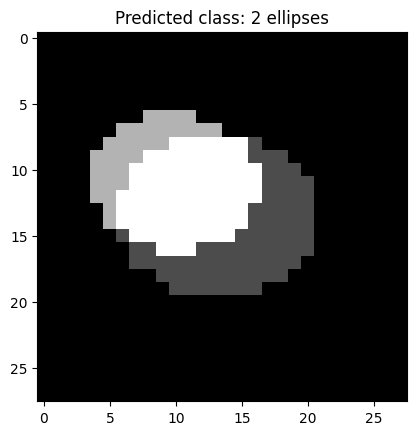

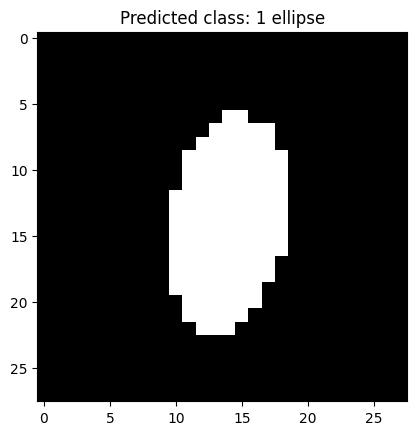

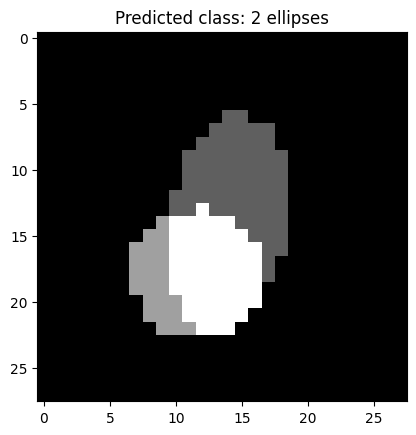

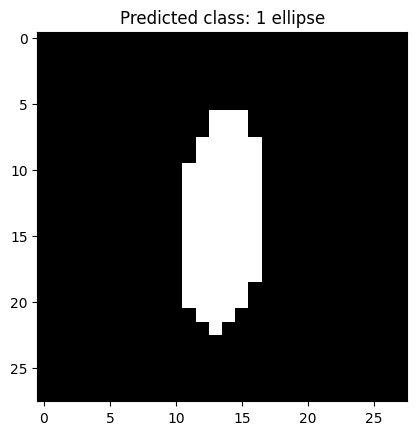

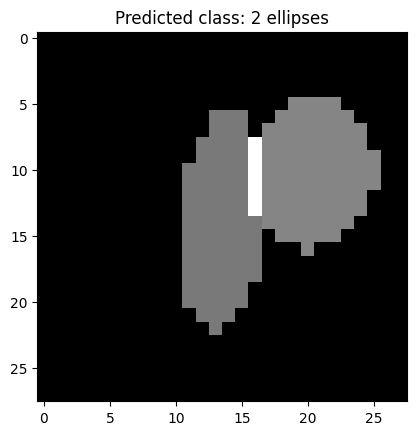

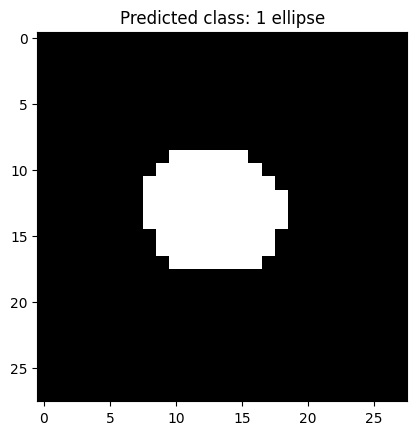

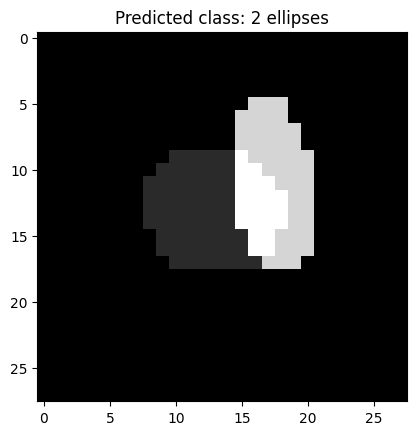

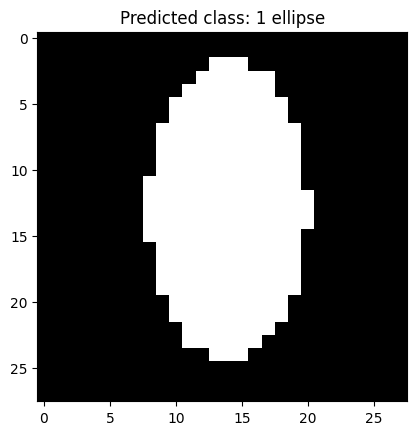

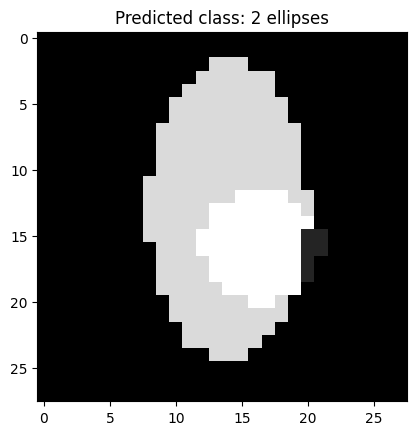

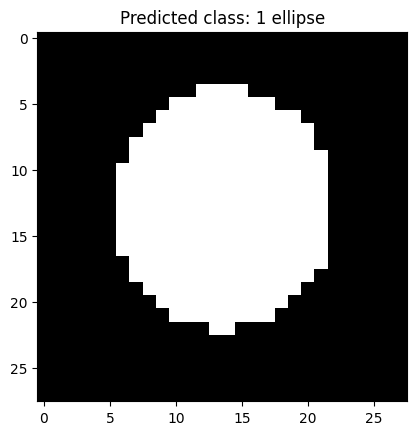

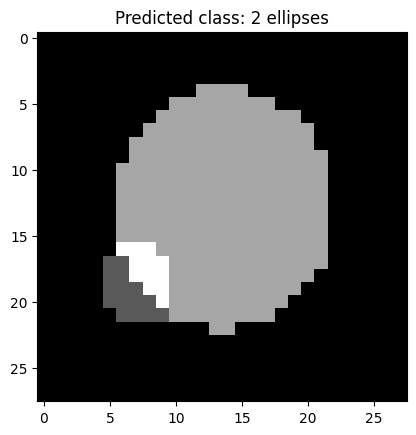

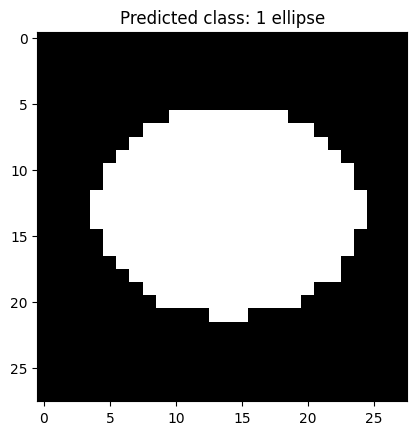

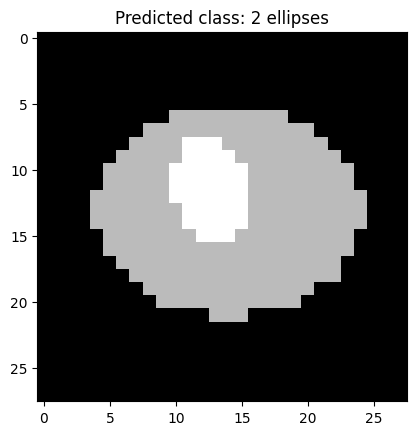

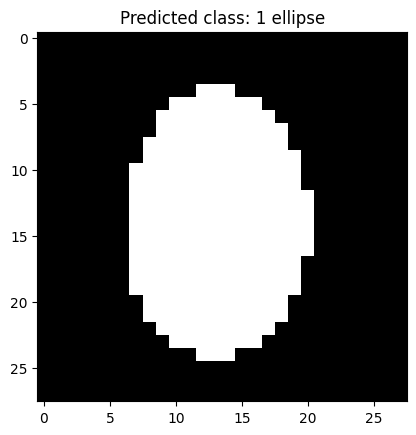

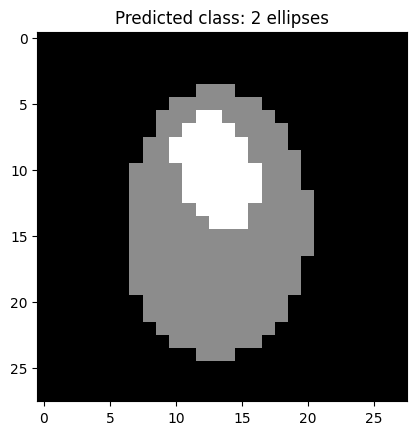

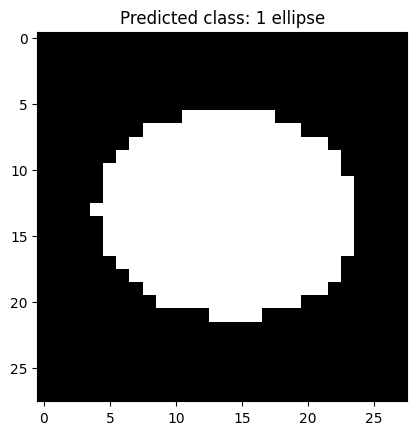

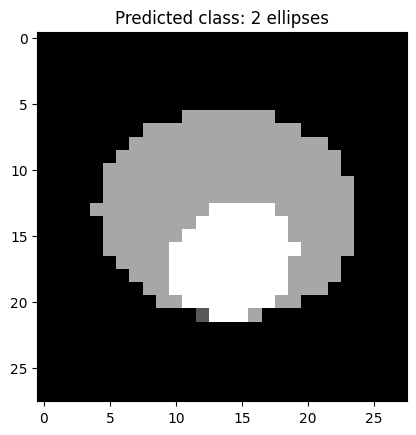

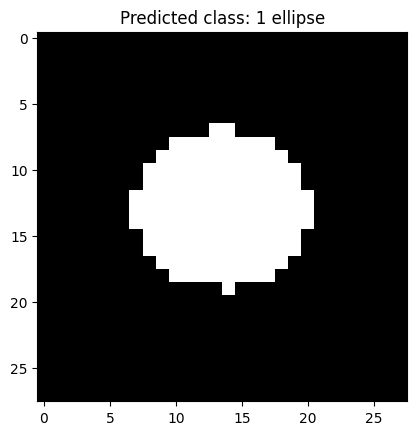

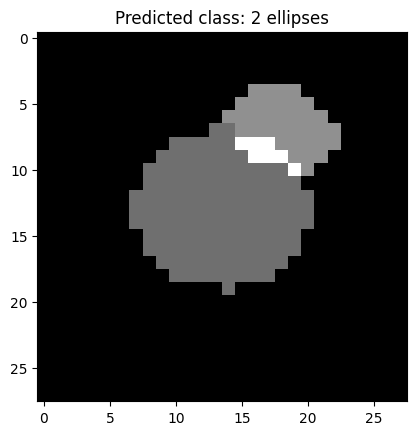

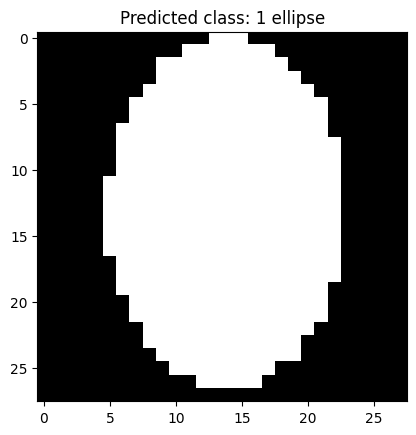

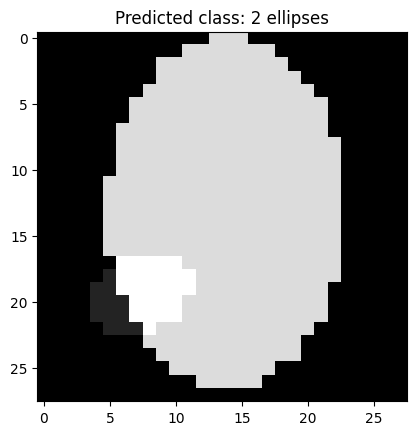

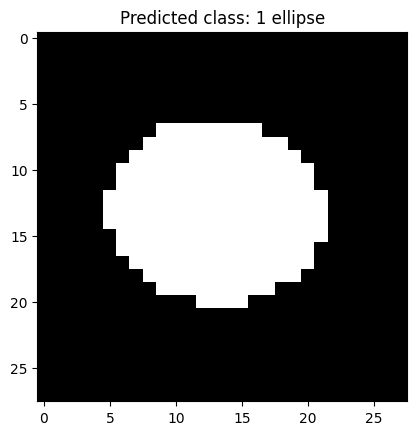

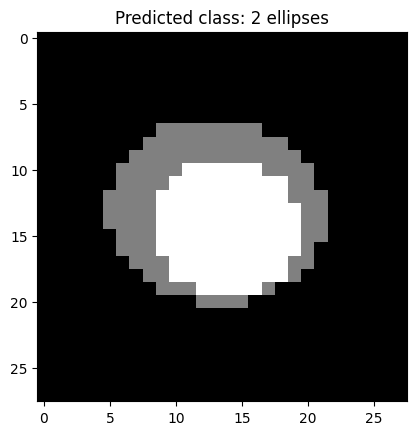

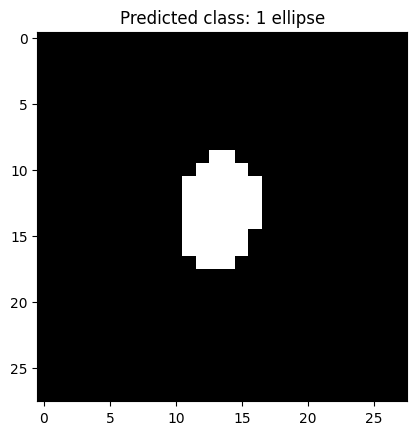

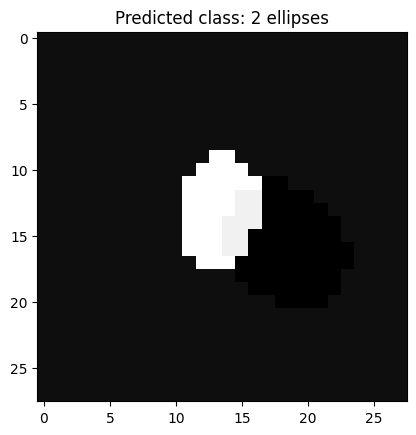

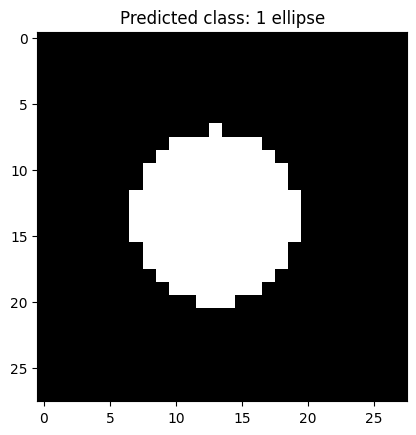

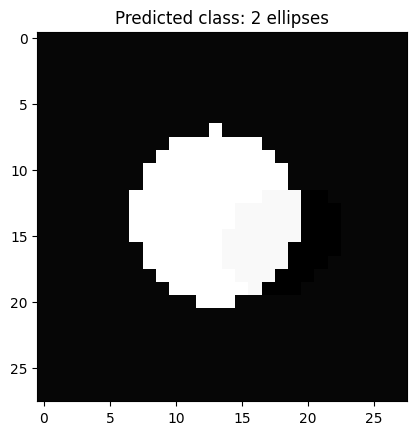

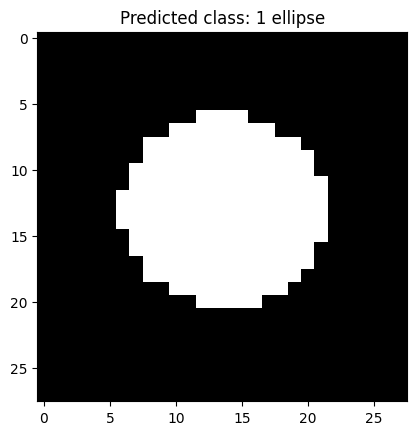

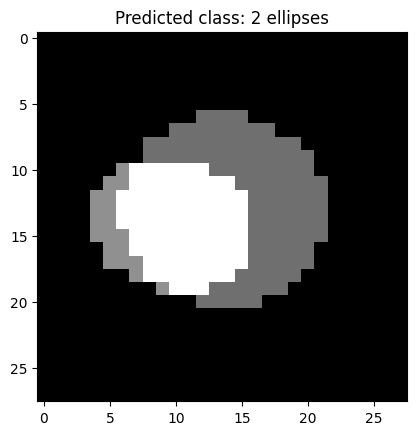

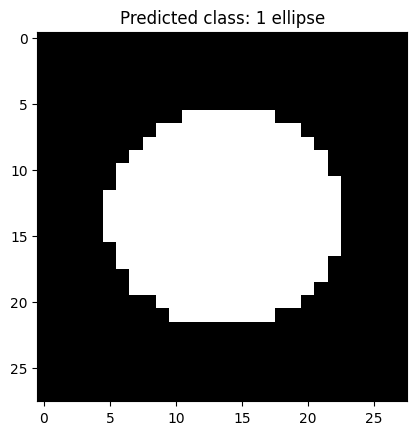

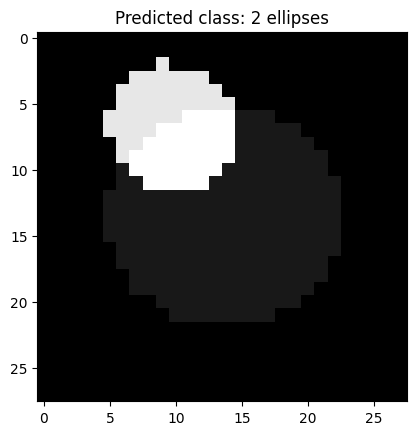

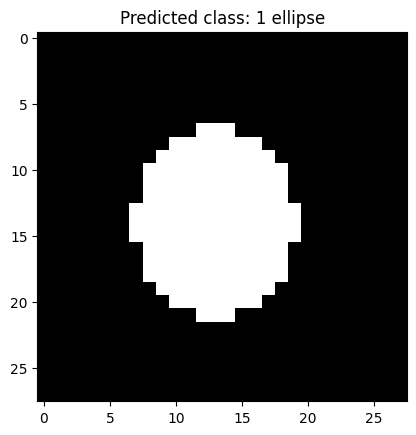

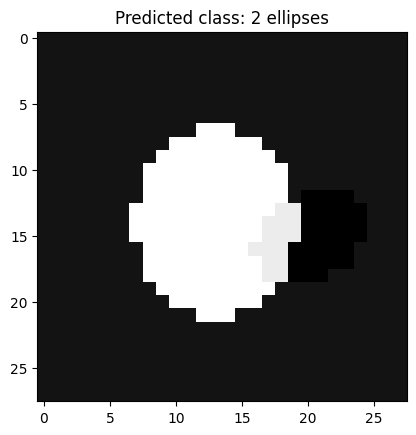

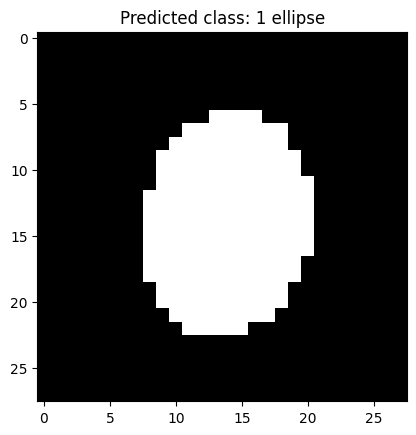

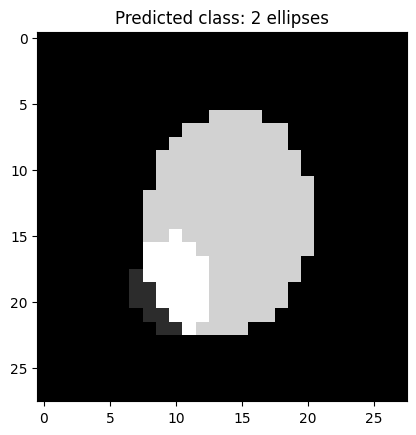

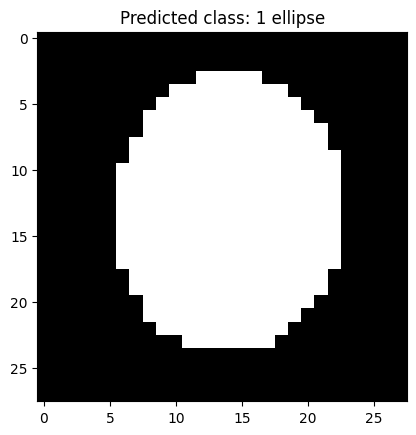

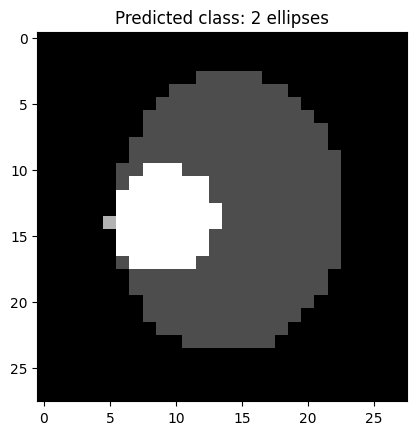

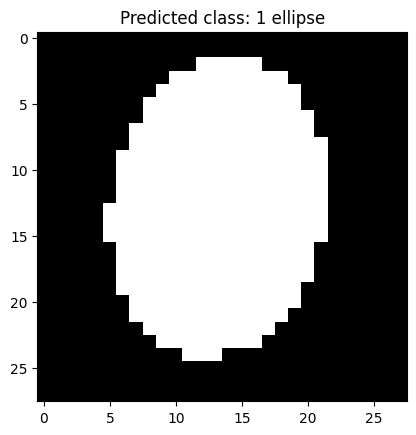

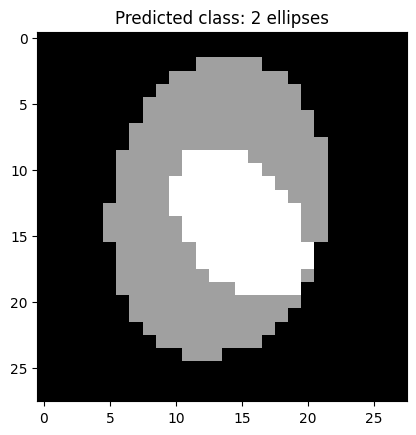

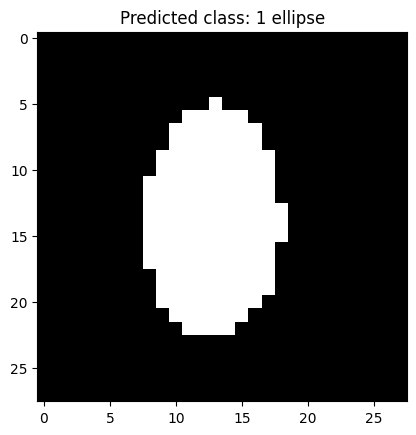

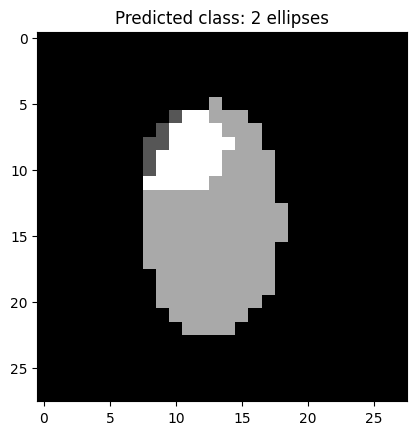

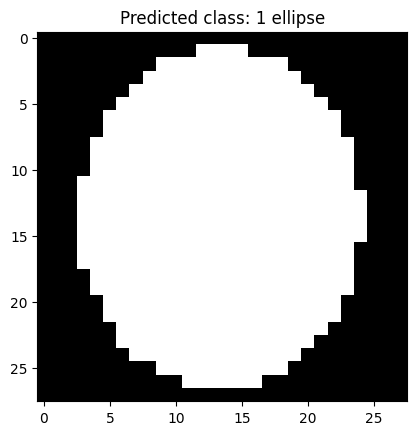

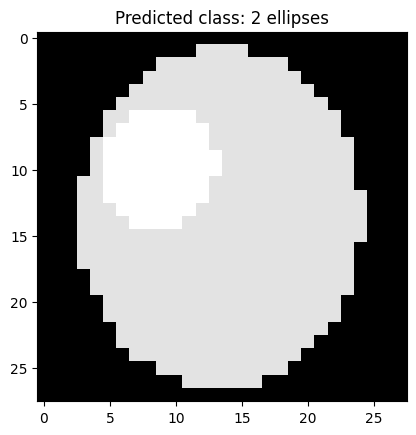

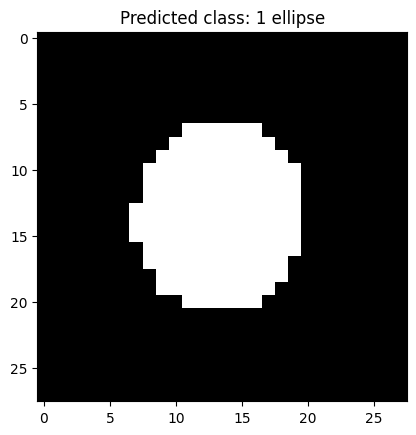

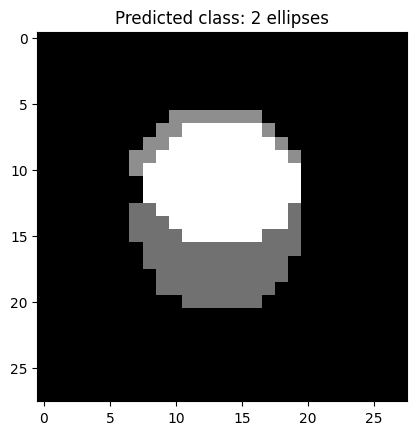

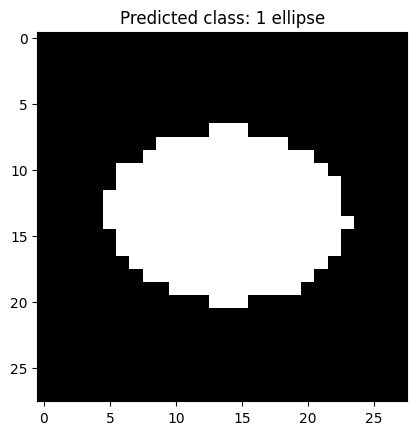

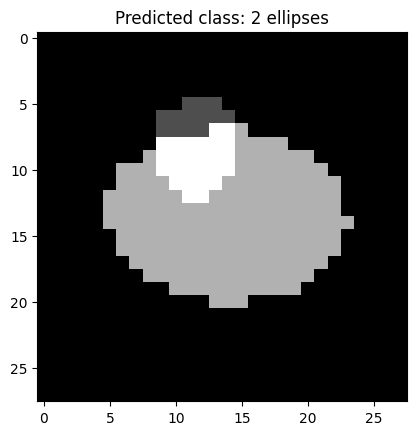

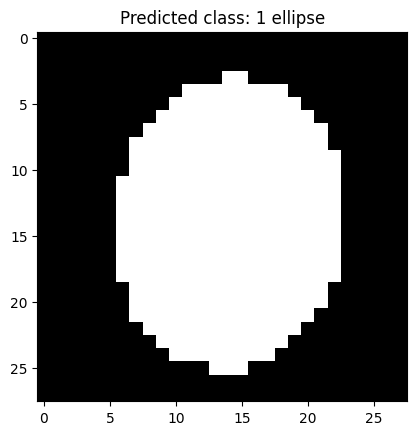

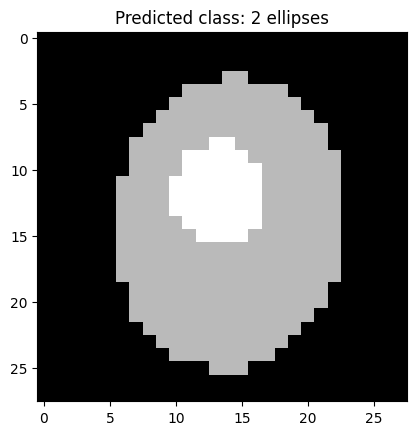

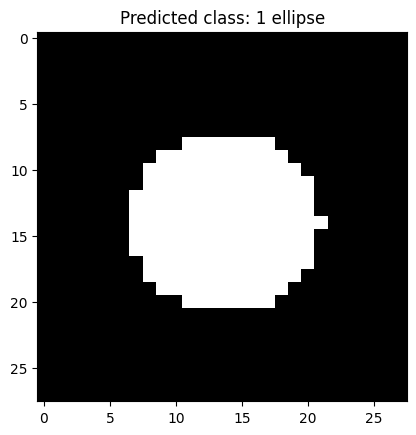

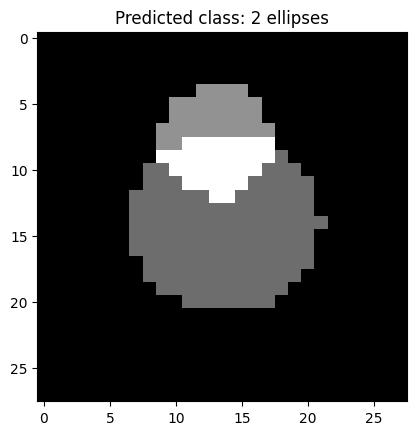

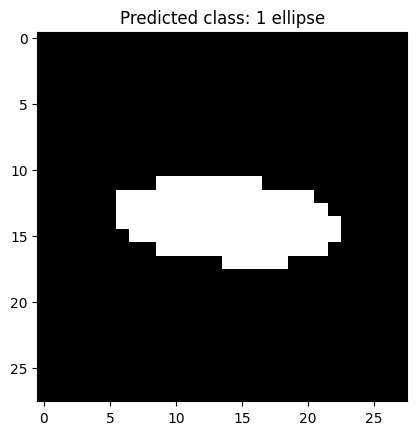

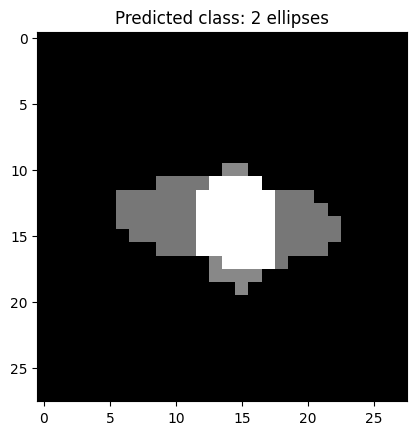

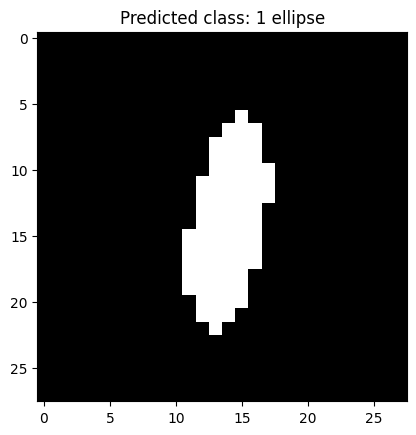

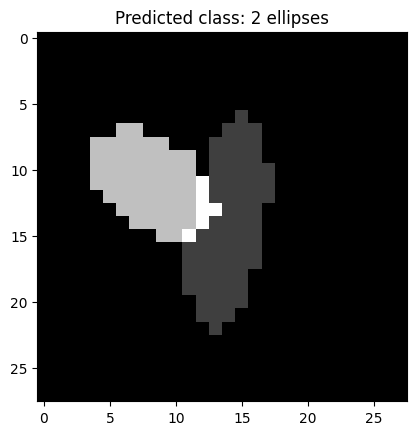

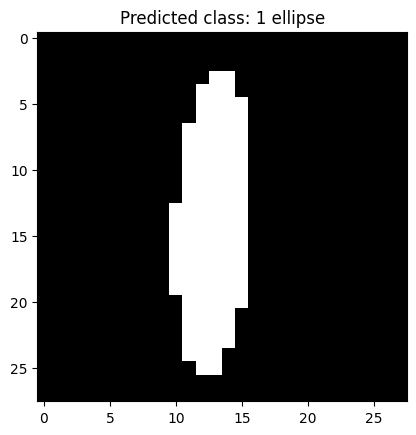

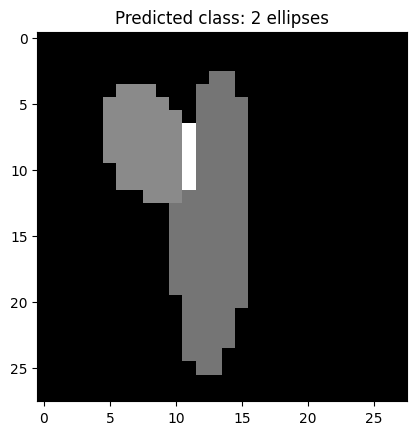

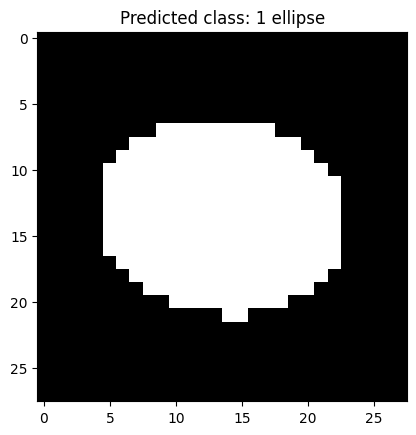

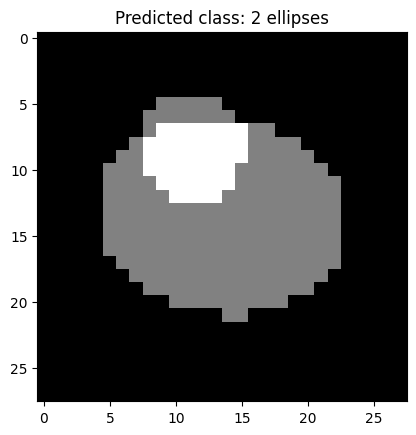

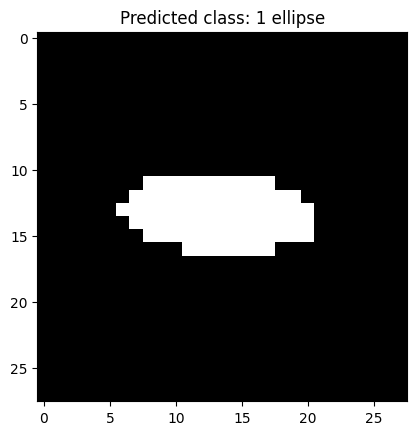

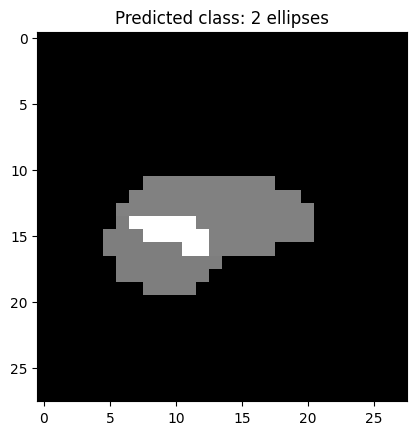

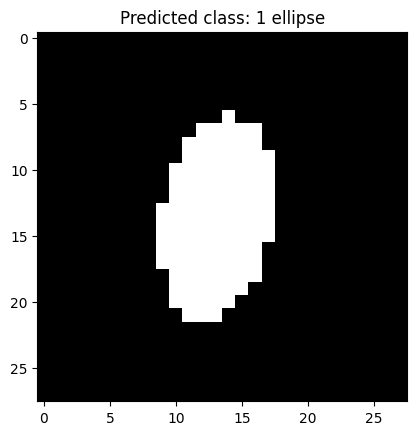

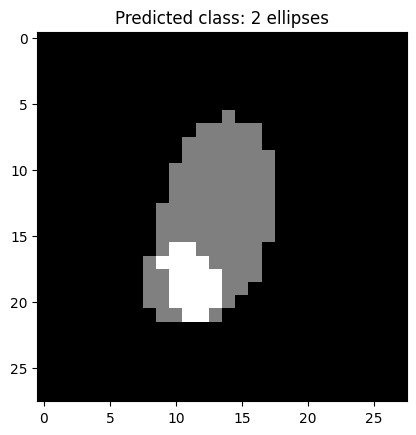

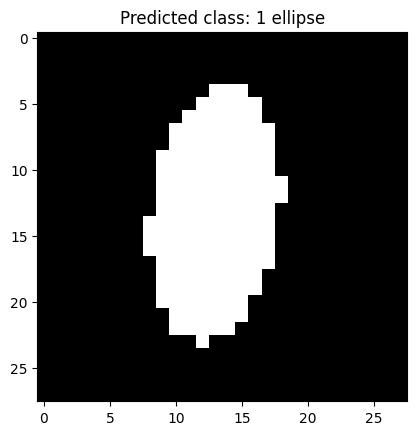

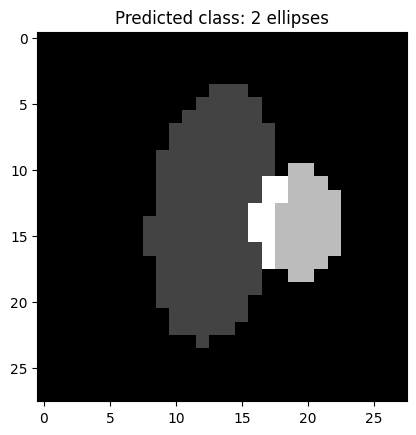

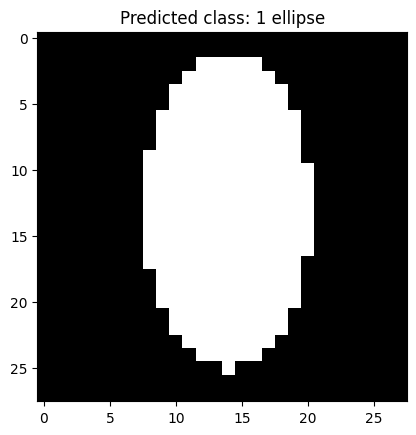

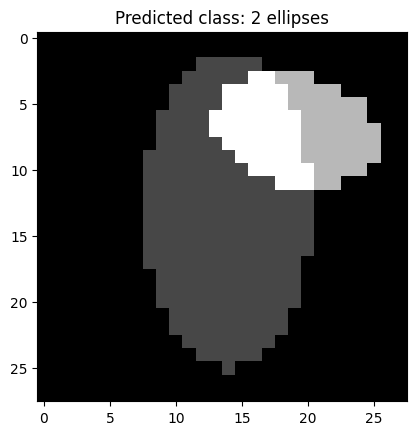

In [72]:
# Display images and their predictions
n = 100
for i in range(n):
    plt.imshow(phantom_list[i], cmap='gray')
    plt.title(f"Predicted class: {prediction_strings[i]}")
    plt.show()